## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

C:\Users\alina\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# How long did the test run for?
df['timestamp'] = pd.to_datetime(df.timestamp)
df.timestamp.max()-df.timestamp.min()

Timedelta('21 days 23:59:49.081927')

b. Use the below cell to find the number of rows in the dataset.

In [4]:
# Number of rows using shape
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
# Computing unique number of id's usinf nunique function
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
converted = round(float(df.converted.mean()),4)
converted

0.1197

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Conditional statement to count number of rows where treatment group does not correspond with new landing page
df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')) == True].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum() # No null values in any column

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Import into df2 only rows which specify following conditions
df2 = df[((df.group == 'treatment') == (df.landing_page == 'new_page')) &
         ((df.group == 'control') == (df.landing_page == 'old_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Drop the raw with an index 2893 and update the original data frame
df2 = df2.drop(df.index[2893]);

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
converted_prob = round(float(df2.converted.mean()),4)
converted_prob

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control_prob = round(float((df2.query('group == "control"')['converted'] == 1).mean()),4)
control_prob

0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment_prob = round(float((df2.query('group == "treatment"')['converted'] == 1).mean()),4)
treatment_prob

0.1188

d. What is the probability that an individual received the new page?

In [18]:
new_page_prob = round(float((df2.query('landing_page == "new_page"')['user_id'].nunique())/(df2.shape[0])),4)
new_page_prob

0.5001

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** There is a little difference between conversion probabilities, which can serve as statistical evidence that a new landing page leads to more conversions. The probablity of users converting in both control and treatment groups is also quite similar to the probability of users converting regardless of the page they received.  

Overal probability of an individual converting, regardelss of landing page type, is **11.96%**  
Control group has a conversion probability of **12.04%**  
Treatment groupgroup has a conversion probability of **11.88%**  
The probability of user receiving new landing page is **50.01%**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of $p_{old}$ and $p_{new}$, which are the converted rates for the old and new pages.

$$H_0 : p_{new} - p_{old} \leq 0$$
$$H_1 : p_{new} - p_{old} > 0$$


**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. 

Use a sample size for each page equal to the ones in **ab_data.csv**.

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Assuming P_new and P_old are equal, they will have exactly the same formulas and values
p_new = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null?

In [20]:
p_old = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
p_old # The answer will be identical to p_new

0.11959708724499628

c. What is $n_{new}$?

In [21]:
# Number of unique users who received new landing page
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new 

145310

d. What is $n_{old}$?

In [22]:
# Number of unique users who received old landing page
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Randomly alocate 0s and 1s with probability p_new under the null, in an array of a size n_new.
new_page_converted = np.random.binomial(1, p_new, n_new) # REVIEW
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# As above the same is performed for old landing page
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
diff = sum(new_page_converted == 1)/n_new - sum(old_page_converted == 1)/n_old
diff

-0.00071097039889635172

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Code taken from the reviewer of the project as of first submission, and it is lighyears fasted than a for-loop originally used. Thank you!
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

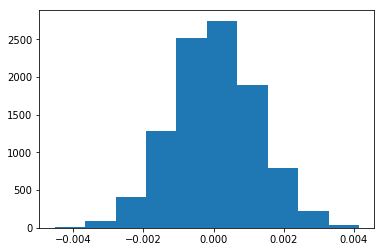

In [27]:
# Convert to array
p_diffs = np.array(p_diffs)
# Plotting
plt.hist(p_diffs);
# The plot apears to be normaly distributed around zero, as expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Get dataframe with all records from treatment group
new_page_df = df2.query('landing_page == "new_page"')
# Compute conversion rate rate for treatment group
new_page_cr = new_page_df.query("converted == 1 ").user_id.nunique()/new_page_df.user_id.nunique()
# Display conversion rate
new_page_cr

0.11880806551510564

In [29]:
# Get dataframe with all records from control group
old_page_df = df2.query('landing_page == "old_page"')
# Compute conversion rate for control group
old_page_cr = old_page_df.query("converted == 1 ").user_id.nunique()/old_page_df.user_id.nunique()
# Display conversion rate
old_page_cr

0.1203863045004612

In [30]:
# Compute the observed difference under the null
obs_diff = new_page_cr - old_page_cr
obs_diff

-0.0015782389853555567

In [31]:
# Create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

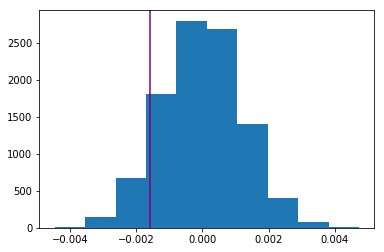

In [32]:
# Plot and see where the observed difference lies
plt.hist(null_vals);
plt.axvline(obs_diff, color='purple')

In [33]:
p_value = (null_vals > obs_diff).mean()
p_value # P-value is greater than 0.05 or 5%

0.89839999999999998

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** P-Value is a probability of observing our statistic or a more extreme statistic from the null hypothesis.  
The P-value computed above is greater than the Type I error threshhold of 5%. Thus we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
from scipy.stats import norm
# Create raw count variables for statistical tests
convert_old = sum(df2.query('landing_page == "old_page"')['converted'] == 1)
convert_new = sum(df2.query('landing_page == "new_page"')['converted'] == 1)
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

In [39]:
# The results look realistic
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
# Two tail test to determine if p_new and p_old are different from each other
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]), np.array([n_new,n_old]), alternative='larger')
# See the result
z_score, p_value 

(-1.3109241984234394, 0.90505831275902449)

In [41]:
# Test significance of z-score
norm.cdf(z_score)

0.094941687240975514

In [42]:
# Tells us what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The z-score of -1.3109241984234394 is less than critical value of 1.959963984540054. The p-value matches the results in **j.**   
Thus, we fail to reject the null hypothesis, conversion rates for new and old lancing page have no statistical difference, this agrees with previous findings in **k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** The response variables provided are of a categorical type. An occurence we need to predict is whether a user will convert on a new landing page or not, and how likely the conversion is to happen. Thus it is best to use the Logistic Regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# Create a dummy variable column for which page each user received
df2 = df2.join(pd.get_dummies(df2['landing_page']))

In [44]:
# Add ab_page column which reflects the values in the treatment column
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
# Attribution Error triggered by scipy version outdate has occured. 
# Possible solution is to run the scripts in another environment, after installing needed versions of scipy, 
# or remain in Jupyter and use following temporary resolution workaround code: https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Fit the Logistic regression model
df2['intercept'] = 1
# Logit regression model for conveted variable and ab_page
logit_mod1 = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:37:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [47]:
np.exp(-0.0150)

0.98511193960306265

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** The p-value associated with ab_page is 0.190, which once more is greater than the alpha threshold of 0.05, confirminf that difference between control and ab_page values do not provide us with a statistically significan results.
The p-value is different due to the following factors:

 - The null hypothesis used in Part II asumes the old landing page converts users more than the new page, i.e. $H_0: p_{new} \leq p_{old}$.  
We will fail to reject the null hyphothesis unless there is a prove that new page is definitely better at a Type I error rate of 5%, i.e. $H_1: p_{new} > p_{old}$.

 - In comparisson the null hypothesis in Part III of this document states there is no difference between the treatment and control groups, i.e. $H_0: p_{new} = p_{old}$  
Alternative hypotheses states that there is a statistical difference between the treatment and control groups i.e. $H_1: p_{new} \neq p_{old}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** It is always a good idea to include other factor variables into the analysis, provided that they are not interrelated with original variables. Adding more factors into the analysis may give insights for a reason of conversion and allow to predict conversion probability more precisely. In terms of landing pages there are a lot of factors which could affect the conversion rate, e.g.: 
- Device type ( PC, tablet or mobile) and whether the landing page was adapted to the device.
- Localisation to suit users demands in a particular region or their language.
- Accessibility, whether a page completed all accessibility tests and is viewable by all users and across devices.
- Runtime of the test, which could determine novelty effect or resistance to change.  

Potential drawbacks of introducing more data into the model is a risk of interdependence between variables or multicollinearity, i.e. new variables might affect the given variables, which in turn will make interpretation of results more complex or potentially incorrect.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [49]:
# Which countries do we have in a countries data frame?
countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
# Join the clean ab_data with countries_df, use user_id as the new key
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# Create dummies for the country values
df3 = df3.join(pd.get_dummies(df3['country']))
# We only need two dummy variables for the model
df3 = df3.drop('CA', axis = 1)
df3.head(2)

,country,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,1


In [51]:
# Logit regression model for conveted and country, use CA as baseline
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK','US']])
results = logit_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:38:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [52]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [53]:
1/np.exp(-0.0149)

1.0150115583846535

**Answer:**  
It is worth noting that P values of the newly introduced variables are quite big, and are over the alpha threshold of 0.05.

For every unit decrease in new_page, convert will be 1.015 times as likely to happen in an old page, holding all other varible constant.  
In the UK conversion is 1.05 times as likely to take place as in Canada, holding all other varibles constant.  
And in the US cinversion is 1.04 times as likely to take place as in Canada, holding all other varibles constant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
# Adding higher order term to see interractions between new page and countries US and UK
df3['new_page_UK'] = df3['new_page']* df3['UK']
df3['new_page_US'] = df3['new_page']* df3['US']

In [55]:
### Fit Your Linear Model And Obtain the Results
# Logit regression model for conveted and country, use CA as baseline
logit_mod3 = sm.Logit(df3['converted'], df3[['intercept','ab_page','new_page_UK','new_page_US','UK','US']])
results = logit_mod3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:               3.482e-05
Time:                        11:38:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page        -0.0674      0.052     -1.297      0.195      -0.169       0.034
new_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
new_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
===============================================================================
"""

In [56]:
# Interpret the Ligostic regression model results
np.exp(results.params)

intercept      0.134794
ab_page        0.934776
new_page_UK    1.081428
new_page_US    1.048001
UK             1.011854
US             1.017682
dtype: float64

**Results:** The P-values for each value in the results are over the alpha threshhold of 0.05, sugesting that these are not statistically significant.

Conversion is 1.08 times and 1.04 times more likely to happen among new landing page users in the UK and in the US respectively, when compared to Canada, holding all other varibles constant.

Also in general users in the UK are 1.011 times more likely to convert, and the US users are 1.017 times more likely to convert, compared to users in Canada, holding all other varibles constant.

Thus, the country a user accessed the new landing page from is not a statistically significant factor for conversion rate.

### Model Diagnostics

In [57]:
# Import sklearn model to split, test and score data, and fit data model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [58]:
# Define X and y variables
X = df3[['new_page','old_page','ab_page','UK','US','new_page_UK','new_page_US']]
y = df3['converted']
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logit_mod = LogisticRegression()
# logistic regression model fitting
logit_mod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred = logit_mod.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(logit_mod.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 87.98%


In [60]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) # The result is that we have 51129 correct predictions and 6988 incorrect predictions.

[[51129     0]
 [ 6988     0]]


In [61]:
precision_score(y_test, y_pred) #Assumption: the test data set is not very good fit for making predictions

C:\Users\alina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [62]:
recall_score(y_test, y_pred)

0.0

C:\Users\alina\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\alina\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


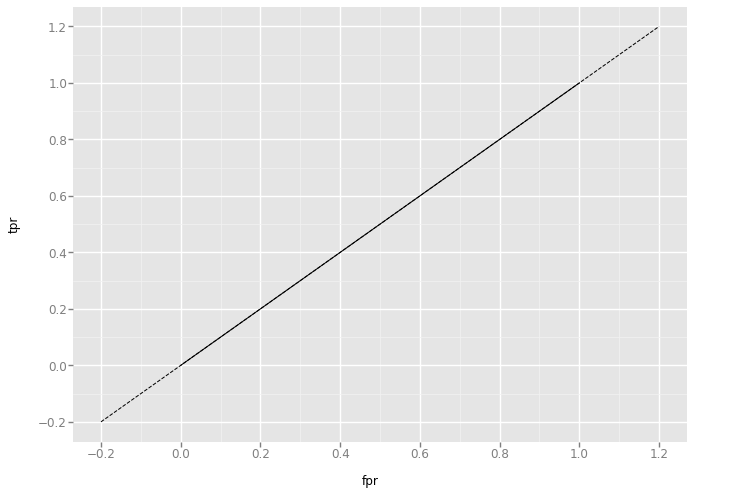

<ggplot: (-9223371906548145955)>

In [63]:
from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = logit_mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

<a id='conclusions'></a>
## Conclusions

We fail to regect the null hypothesis, as users were more likely to convert using old landing page. Furthermore, additional factors - countries - did not demonstrate to have significant effect on conversion rates.

Provided A/B testing data set is not a good fit for predicting conversions on a new landing page. Possible reasons among others are:  
1) Fuller data required. From data provided we can not see whether a new landing page is localised and adapted to suit requirements of the target audience.  
2) We do not have information about users apart from their unique IDs.  
3) The test results provided, span over 21 full days only, which is not long enough to see if reduced conversion rates on the new landing page were due to novelty effect or resistance to change, or in general any change to take place.  
4) Even though we observe on average a 12% conversion rate, we cannot see what is the conversion value, and thus cannot conclude with confidence whether conversion rate on new landing page actually brings more profit or not.  

### Resources
Majority of code is based on original Udacity code or external links to blogs given in the Udacity tutorials, apart from an error workaround dicussed below.  
**Attribution Error** triggered by scipy version outdate has occured. Possible solution is to run the scripts in another environment, after installing needed versions of scipy, or remain in Jupyter and use following temporary resolution workaround code found on https://github.com/statsmodels/statsmodels/issues/3931.  

------------------------------------------------------
### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.